<a href="https://colab.research.google.com/github/ardiyfirman88/ardiyfirman88/blob/main/Firman_Ardiyansyah_Data_Science_Perqara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective

###Problem statement

How to create campaign to increase conversion rate by 0.66 % in the next quarter to appropriate customer segmentation in order to maintain conversion rate.

#Data Gathering

The datasets present the summary of customer transaction records on Gustavo's website from  2016 to 2018 consist of 
- [orders_dataset](https://docs.google.com/spreadsheets/d/1D3nW55jQdXmK_9THpa4CfACY00X-xqUDQnErAmarMHY/edit#gid=1759752312) 
- [customers_dataset](https://docs.google.com/spreadsheets/d/15973vkEIhDCUsx21yTTcmkobliEIrEn1wAFX4MxiYlk/edit#gid=77695115) 
- [order_payments_dataset](https://docs.google.com/spreadsheets/d/1uxMcxasPPkd0xMy3Mk2lI5X5bUO94D5031ZNS15PKxw/edit#gid=59086285) 

with detail below


orders_dataset


*   order_id    : unique identifier of the order
*   customer_id : key to the customer dataset. Each order has a unique customer_id
*   order_status : Reference to the order status (delivered, shipped, etc
*   order_purchase_timestamp : Shows the purchase timestamp
*   order_approved_at : shows the payment approval timestamp
*   order_delivered_carrier_date : shows the order posting timestamp. When it was handled to the logistic partner
*   order_delivered_customer_date : shows the actual order delivery date to the customer
*   order_estimated_delivery_date : shows the estimated delivery date that was informed to customer at the purchase moment

customer_dataset

*   customer_id : key to the orders dataset. Each order has a unique customer_id
*   customer_unique_id : unique identifier of a customer
*   customer_zip_code_prefix : first five digits of customer zip code
*   customer_city : customer city name
*   customer_state :customer state

payment_dataset

*   order_id : unique identifier of an order
*   payment_sequential : a customer may pay an order with more than one payment method. If he does so, a sequence will be created
*   payment_type : method of payment chosen by the customer
*   payment_installments : number of installments chosen by the customer
*   payment_value : transaction value


#1.Data Preparation

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import math
from scipy import stats
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from sklearn.linear_model import LinearRegression


##Read dataset

### Read order dataset (df1)

In [ ]:
url_sheet1 = 'https://docs.google.com/spreadsheets/d/1D3nW55jQdXmK_9THpa4CfACY00X-xqUDQnErAmarMHY/edit#gid=1759752312'
url_sheet1_trf = url_sheet1.replace('/edit#gid=', '/export?format=csv&gid=')
df1_ori= pd.read_csv(url_sheet1_trf)
df1_ori.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Read customer dataset (df2)

In [ ]:
url_sheet2 = 'https://docs.google.com/spreadsheets/d/15973vkEIhDCUsx21yTTcmkobliEIrEn1wAFX4MxiYlk/edit#gid=77695115'
url_sheet2_trf = url_sheet2.replace('/edit#gid=', '/export?format=csv&gid=')
df2_ori = pd.read_csv(url_sheet2_trf)
df2_ori.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Read order payments dataset (df3)

In [ ]:
url_sheet3 = 'https://docs.google.com/spreadsheets/d/1uxMcxasPPkd0xMy3Mk2lI5X5bUO94D5031ZNS15PKxw/edit#gid=59086285'
url_sheet3_trf = url_sheet3.replace('/edit#gid=', '/export?format=csv&gid=')
df3_ori = pd.read_csv(url_sheet3_trf)
df3_ori.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##Copy data from original data import

In [ ]:
df1 = df1_ori.copy()
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df2 = df2_ori.copy()
df2


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df3 = df3_ori.copy()
df3


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


##Check dtype data

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


type of data in columns below need change to datetime
*   order_purchase_timestamp  
*   order_approved_at
*   order_delivered_carrier_date
*   order_delivered_customer_date
*   order_estimated_delivery_date








In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


#2.Cleaning data

##Converting data type in df1

In [ ]:
df1[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']] = df1[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime,errors='coerce')
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


###Add variable 'delivery_time(days)' = 'order_delivered_customer_date' - 'order_delivered_carrier_date'

In [ ]:
df1['delivery_time(days)']=(df1['order_delivered_customer_date']-df1['order_delivered_carrier_date']).dt.days
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time(days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,7.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,20.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,23.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,13.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time(days)            96475 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


In [ ]:
df3[(df3['order_id']=='fa65dad1b0e818e3ccc5cb0e39231352')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df3.duplicated().sum()

0

##Remove irrelevant columns

In [ ]:
df1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
delivery_time(days)              2966
dtype: int64

###df1 ==> drop columns 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'

In [ ]:
df1.drop(['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'],inplace=True,axis=1)
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,1.0
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,7.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,20.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,23.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,13.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   order_approved_at         99281 non-null  datetime64[ns]
 5   delivery_time(days)       96475 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 4.6+ MB


###df2 ==> drop column 'customer_zip_code_prefix' could be represented by customer_state 

In [ ]:
df2.drop(['customer_zip_code_prefix'],inplace=True,axis=1)
df2

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


## Check typos

In [ ]:
#df1
data = df1[['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at','delivery_time(days)']]
column_name = list(['order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at','delivery_time(days)'])
for i in data :
    for x in column_name:
     result = data[i].value_counts()
     x = i
    print('''Check typo for columns {} =
{}'''.format(x,result),end='\n\n')

Check typo for columns order_id =
e481f51cbdc54678b7cc49136f2d6af7    1
f01059d0d674e1282df4e8fbbe015aa2    1
fbc17f0f2a2125054d5ac5c22d2d5120    1
9373150545066777b1cd2bc20e93cf8e    1
917399e96f92268dfa2c0351b1b75fba    1
                                   ..
6b8986012d61963295ffa3ea869aff86    1
be879f757debd3b384b540daa6ddd97e    1
ac3ce7eda1246f39509a505242fcc169    1
e801a93b3904ca9e8350f176a037047b    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: order_id, Length: 99441, dtype: int64

Check typo for columns customer_id =
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 99441, dtype: int64



In [ ]:
#df2
data = df2[['customer_id','customer_unique_id','customer_city','customer_state']]
column_name = list(['customer_id','customer_unique_id','customer_city','customer_state'])
for i in data :
    for x in column_name:
     result = data[i].value_counts()
     x = i
    print('''Check typo for columns {} =
{}'''.format(x,result),end='\n\n')

Check typo for columns customer_id =
06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: customer_id, Length: 99441, dtype: int64

Check typo for columns customer_unique_id =
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa9f56a0     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id

In [ ]:
#df3
data = df3[['order_id','payment_sequential','payment_type','payment_installments','payment_value']]
column_name = list(['order_id','payment_sequential','payment_type','payment_installments','payment_value'])
for i in data :
    for x in column_name:
     result = data[i].value_counts()
     x = i
    print('''Check typo for columns {} =
{}'''.format(x,result),end='\n\n')

Check typo for columns order_id =
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

Check typo for columns payment_sequential =
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
16        6
17        6
21        4
20        4
22        3
26        2
24        2
23        2
25        2
29        1
28        1
27        1
Name: payment_sequential, dtype: int64

Check typo for columns payment_type =
credit_card    76795
b

Summary =
*   df1 ==> drop category 'unavailable'in order_status
*   df3 ==> drop category 'not_defined' in payment_type
*   df3 ==> drop category '0' in payment_installment






##Remove irrelevant data

In [ ]:
df1.drop(df1[(df1['order_status']=='unavailable')].index,inplace=True)
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,1.0
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,7.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,20.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,23.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,13.0


In [ ]:
df1['order_status'].value_counts()

delivered     96478
shipped        1107
canceled        625
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [ ]:
df3.drop(df3[(df3['payment_type']=='not_defined')| (df3['payment_installments']==0)].index,inplace=True)
df3

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
#df3
data = df3[['payment_type','payment_installments']]
column_name = list(['payment_type','payment_installments'])
for i in data :
    for x in column_name:
     result = data[i].value_counts()
     x = i
    print('''Check typo for columns {} =
{}'''.format(x,result),end='\n\n')

Check typo for columns payment_type =
credit_card    76793
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

Check typo for columns payment_installments =
1     52543
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
22        1
23        1
Name: payment_installments, dtype: int64



##Handling missing data

In [ ]:
df1.isna().sum()

order_id                       0
customer_id                    0
order_status                   0
order_purchase_timestamp       0
order_approved_at            160
delivery_time(days)         2357
dtype: int64

###df1 ==> null value in duration_logistic will be filled with 0 value otherwise null value in approved_at will be filled by purchase_timestamp due to the information are needed to know customer activity

In [ ]:
df1_copy = df1.copy()

In [ ]:
df1_copy[['delivery_time(days)']]= df1_copy[['delivery_time(days)']].fillna(0)
df1_copy

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,1.0
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,7.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,20.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,23.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,13.0


In [ ]:
df1_copy =df1_copy.fillna(method='pad',axis=1)
df1_copy

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days)
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,1.0
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,7.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,20.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,23.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,13.0


In [ ]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98832 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  98832 non-null  object        
 1   customer_id               98832 non-null  object        
 2   order_status              98832 non-null  object        
 3   order_purchase_timestamp  98832 non-null  datetime64[ns]
 4   order_approved_at         98832 non-null  datetime64[ns]
 5   delivery_time(days)       98832 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 5.3+ MB


In [ ]:
df1_copy[['delivery_time(days)']]=df1_copy[['delivery_time(days)']].astype(float)

In [ ]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98832 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  98832 non-null  object        
 1   customer_id               98832 non-null  object        
 2   order_status              98832 non-null  object        
 3   order_purchase_timestamp  98832 non-null  datetime64[ns]
 4   order_approved_at         98832 non-null  datetime64[ns]
 5   delivery_time(days)       98832 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 5.3+ MB


In [ ]:
df1 = df1_copy

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98832 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  98832 non-null  object        
 1   customer_id               98832 non-null  object        
 2   order_status              98832 non-null  object        
 3   order_purchase_timestamp  98832 non-null  datetime64[ns]
 4   order_approved_at         98832 non-null  datetime64[ns]
 5   delivery_time(days)       98832 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 5.3+ MB


## Check duplicate data

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df3.duplicated().sum()

0

##Combine the dataset into single dataset

df1_2 >> combine  df2 with df1

In [ ]:
df1_2 = df1.merge(df2,how='left',left_on='customer_id',right_on ="customer_id")
df1_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,6.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,12.0,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,9.0,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,9.0,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,1.0,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
...,...,...,...,...,...,...,...,...,...
98827,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,7.0,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP
98828,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,20.0,da62f9e57a76d978d02ab5362c509660,praia grande,SP
98829,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,23.0,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA
98830,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,13.0,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ


df_table >> combine  df1_2 with df3

In [ ]:
df_table = df3.merge(df1_2,how='left',left_on='order_id',right_on ="order_id")
df_table

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103876,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,3.0,b6027ac07fb76ebca8c97b1887865aee,atibaia,SP
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG
103878,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,0.0,d3c7da954a324253814096bcaf240e4e,sao paulo,SP
103879,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,12.0,b84dc68f02f122a88d7e7bbd37b06204,rio de janeiro,RJ


In [ ]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103881 entries, 0 to 103880
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103881 non-null  object        
 1   payment_sequential        103881 non-null  int64         
 2   payment_type              103881 non-null  object        
 3   payment_installments      103881 non-null  int64         
 4   payment_value             103881 non-null  float64       
 5   customer_id               103232 non-null  object        
 6   order_status              103232 non-null  object        
 7   order_purchase_timestamp  103232 non-null  datetime64[ns]
 8   order_approved_at         103232 non-null  datetime64[ns]
 9   delivery_time(days)       103232 non-null  float64       
 10  customer_unique_id        103232 non-null  object        
 11  customer_city             103232 non-null  object        
 12  cu

###Remove column customer_id after combine the dataset

In [ ]:
df_table.drop(['customer_id'],inplace=True,axis=1)
df_table

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
103876,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,3.0,b6027ac07fb76ebca8c97b1887865aee,atibaia,SP
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG
103878,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,0.0,d3c7da954a324253814096bcaf240e4e,sao paulo,SP
103879,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,12.0,b84dc68f02f122a88d7e7bbd37b06204,rio de janeiro,RJ


In [ ]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103881 entries, 0 to 103880
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103881 non-null  object        
 1   payment_sequential        103881 non-null  int64         
 2   payment_type              103881 non-null  object        
 3   payment_installments      103881 non-null  int64         
 4   payment_value             103881 non-null  float64       
 5   order_status              103232 non-null  object        
 6   order_purchase_timestamp  103232 non-null  datetime64[ns]
 7   order_approved_at         103232 non-null  datetime64[ns]
 8   delivery_time(days)       103232 non-null  float64       
 9   customer_unique_id        103232 non-null  object        
 10  customer_city             103232 non-null  object        
 11  customer_state            103232 non-null  object        
dtypes:

###Check duplicate

In [ ]:
df_table.duplicated().sum()

0

###Remove null values 0.62% 

In [ ]:
df_table = df_table.dropna()
df_table

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
103876,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,3.0,b6027ac07fb76ebca8c97b1887865aee,atibaia,SP
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG
103878,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,0.0,d3c7da954a324253814096bcaf240e4e,sao paulo,SP
103879,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,12.0,b84dc68f02f122a88d7e7bbd37b06204,rio de janeiro,RJ


In [ ]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103232 entries, 0 to 103880
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103232 non-null  object        
 1   payment_sequential        103232 non-null  int64         
 2   payment_type              103232 non-null  object        
 3   payment_installments      103232 non-null  int64         
 4   payment_value             103232 non-null  float64       
 5   order_status              103232 non-null  object        
 6   order_purchase_timestamp  103232 non-null  datetime64[ns]
 7   order_approved_at         103232 non-null  datetime64[ns]
 8   delivery_time(days)       103232 non-null  float64       
 9   customer_unique_id        103232 non-null  object        
 10  customer_city             103232 non-null  object        
 11  customer_state            103232 non-null  object        
dtypes:

##Handling Outlier

Before drop outlier

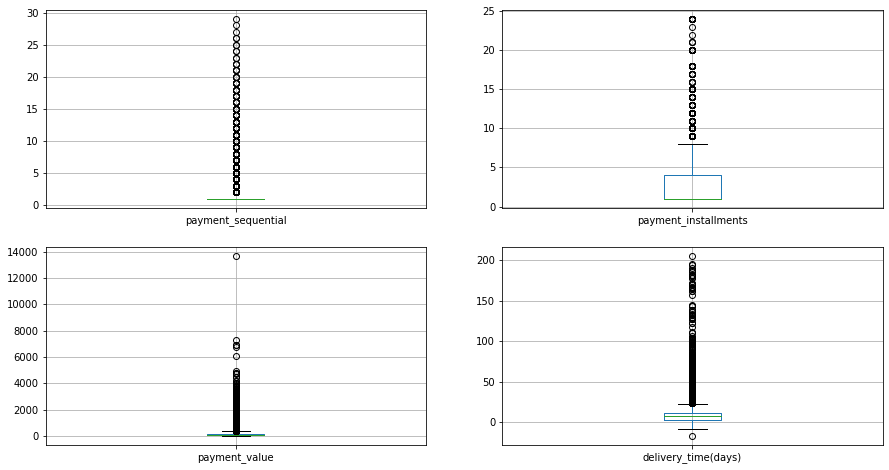

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
numerical_column = df_table[['payment_sequential','payment_installments','payment_value','delivery_time(days)']]
for index_col,col_name in enumerate(numerical_column):
  boxplot_vis = df_table.boxplot(col_name,ax=axes.flatten()[index_col])
plt.show()

Most of outlier was had by payment_value and there is irreguler condition in delivery time cause there is value less than 0 days (same day)

In [ ]:
numerical_variable = df_table[['payment_value','delivery_time(days)']]
variable_name = list(['payment_value','delivery_time(days)'])
for i in numerical_variable :
    for j in variable_name:
           Q1 = numerical_variable[i].quantile(0.25)
           Q3 = numerical_variable[i].quantile(0.75)
           IQR = Q3 - Q1
           IQR
           lower_range = Q1 - (1.5*IQR)
           upper_range = Q3 + (1.5*IQR)
    j = i
    print('''\ncolumn {} :
lower_range ={}
upper_range = {}'''.format(j,lower_range,upper_range))


column payment_value :
lower_range =-115.69124999999998
upper_range = 344.27874999999995

column delivery_time(days) :
lower_range =-9.0
upper_range = 23.0


lower_range for delivery_time(days) will be set up equal to 0 (minus in duration means orders were arrived before approved order by seller --> impossible).

lower_range for payment_value will be set up more than 0 (0 means there is no payment or less than 0 means defisit values).

In [ ]:
df_table = df_table[df_table['delivery_time(days)']>=0]
df_table = df_table[df_table['delivery_time(days)']<=23]
df_table = df_table[df_table['payment_value']>0]
df_table = df_table[df_table['payment_value']<=344.27874999999995]
df_table

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
103873,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62,shipped,2017-11-23 17:11:23,2017-11-24 10:11:48,0.0,1c157ec47b1201b33c6ea9cc61c966fb,fortaleza,CE
103874,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,5.0,13f283df2f4760f22b57830865761d07,foz do iguacu,PR
103875,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65,canceled,2018-03-15 10:06:35,2018-03-15 10:29:39,0.0,0858c8086ef3b4bc86fef82638bcfa52,campo grande,MS
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG


After drop outlier

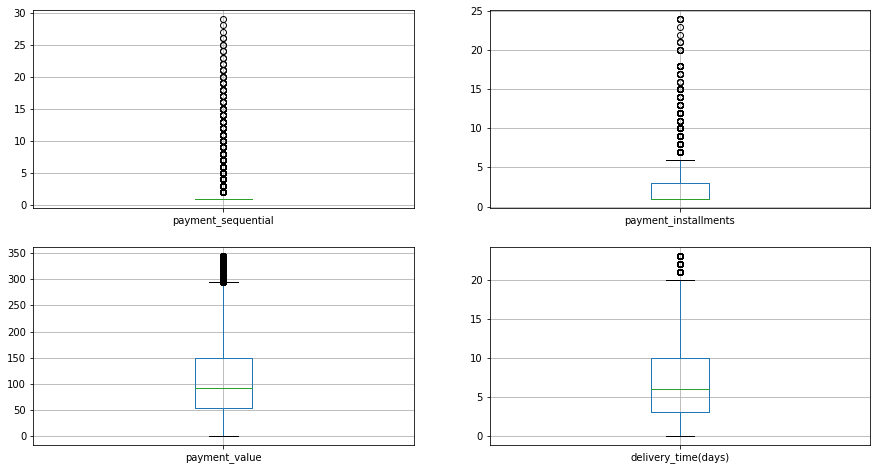

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
numerical_column = df_table[['payment_sequential','payment_installments','payment_value','delivery_time(days)']]
for index_col,col_name in enumerate(numerical_column):
  boxplot_vis = df_table.boxplot(col_name,ax=axes.flatten()[index_col])
plt.show()

In [ ]:
df_table

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
103873,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62,shipped,2017-11-23 17:11:23,2017-11-24 10:11:48,0.0,1c157ec47b1201b33c6ea9cc61c966fb,fortaleza,CE
103874,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,5.0,13f283df2f4760f22b57830865761d07,foz do iguacu,PR
103875,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65,canceled,2018-03-15 10:06:35,2018-03-15 10:29:39,0.0,0858c8086ef3b4bc86fef82638bcfa52,campo grande,MS
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG


In [ ]:
df1['order_status'].value_counts()

delivered     96478
shipped        1107
canceled        625
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [ ]:
df_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90575 entries, 0 to 103878
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  90575 non-null  object        
 1   payment_sequential        90575 non-null  int64         
 2   payment_type              90575 non-null  object        
 3   payment_installments      90575 non-null  int64         
 4   payment_value             90575 non-null  float64       
 5   order_status              90575 non-null  object        
 6   order_purchase_timestamp  90575 non-null  datetime64[ns]
 7   order_approved_at         90575 non-null  datetime64[ns]
 8   delivery_time(days)       90575 non-null  float64       
 9   customer_unique_id        90575 non-null  object        
 10  customer_city             90575 non-null  object        
 11  customer_state            90575 non-null  object        
dtypes: datetime64[ns]

#3.Descriptive Analysis-EDA

In [ ]:
df_table1 = df_table.copy()

##Drop canceled and create status order

In [ ]:
df_unordered = df_table1[(df_table['order_status']=='canceled')|(df_table['order_status']=='created')]
df_unordered 

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
28,5d9c5817e278892b7498d90bfa28ade8,1,credit_card,2,290.16,canceled,2018-04-26 08:13:54,2018-04-26 08:32:52,0.0,67a7e94ec59ef6d6ba83942c81d39b9a,sao paulo,SP
68,947e9c6bfd83a06953c420ef92d3da6e,1,voucher,1,69.46,canceled,2018-08-15 15:13:32,2018-08-15 15:13:32,0.0,a2ac4c64994786e12db70e1782d2bfef,sao paulo,SP
259,90eaac01afdf4e531a70ad869e092c75,1,credit_card,1,234.43,canceled,2018-06-05 15:15:24,2018-06-05 15:36:54,0.0,cd71c345cffd7d0edcfa17034446350b,porto velho,RO
442,61792c6272346d7f4b7c5b1747df7b1a,1,credit_card,4,49.34,canceled,2017-03-08 11:51:41,2017-03-08 12:33:15,0.0,75bf2fd30af0de267a66a0e6be8c1213,sao luis,MA
848,750ed62dff96bf5713b8c6a6bbfdc948,1,boleto,1,189.96,canceled,2018-05-28 11:18:59,2018-05-29 03:15:20,0.0,fd8ae395b4b313a4af523a90a92d6c10,guarulhos,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
103385,56f251ca89f74d06076966d5d49b9dc6,1,credit_card,4,110.40,canceled,2018-03-01 18:03:33,2018-03-01 18:15:44,0.0,681405a99faf3ac8afc2dc018a3f67bb,carangola,MG
103752,ce0a53468ddde09e79f73edba370ceec,1,credit_card,6,81.89,canceled,2018-02-08 16:39:22,2018-02-08 17:29:35,0.0,8fe321ed17c18cda96d1010a06938f77,vitoria da conquista,BA
103761,b17fd4c033b06e8d888de8ea6105ef9d,1,credit_card,5,103.10,canceled,2017-03-20 19:38:10,2017-03-20 19:38:10,0.0,802ce2dcb7d0d4a534945e27d53a9636,rio de janeiro,RJ
103793,4f259869d5c650af6f847b027032515b,1,voucher,1,176.56,canceled,2018-04-28 19:25:30,2018-04-29 19:35:35,0.0,d3a632335982db082524ce259ab13c13,jacarei,SP


In [ ]:
df_unordered.duplicated().sum()

0

In [ ]:
df_unordered['order_status'].value_counts()

canceled    578
created       5
Name: order_status, dtype: int64

In [ ]:
df_table1.drop(df_unordered.index, inplace=True)
df_table1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11,delivered,2018-03-06 20:19:31,2018-03-06 20:30:39,20.0,18f40b803060d9883643b7e64e91628e,rio de janeiro,RJ
103873,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62,shipped,2017-11-23 17:11:23,2017-11-24 10:11:48,0.0,1c157ec47b1201b33c6ea9cc61c966fb,fortaleza,CE
103874,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,5.0,13f283df2f4760f22b57830865761d07,foz do iguacu,PR
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG


##EDA

In [ ]:
numerical_variable = df_table1[['payment_sequential','payment_installments','payment_value','delivery_time(days)']]
numerical_variable.describe()

,payment_sequential,payment_installments,payment_value,delivery_time(days)
count,89992.000000,89992.000000,89992.000000,89992.000000
mean,1.099142,2.614321,109.480484,7.296160
std,0.741982,2.441060,72.596219,5.290999
min,1.000000,1.000000,0.010000,0.000000
25%,1.000000,1.000000,53.590000,3.000000
50%,1.000000,1.000000,91.410000,6.000000
75%,1.000000,3.000000,149.740000,10.000000
max,29.000000,24.000000,344.270000,23.000000


mostly once payment sequence and more than one payment installments 

In [ ]:
df_table1.describe(exclude=[np.number])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,order_id,payment_type,order_status,order_purchase_timestamp,order_approved_at,customer_unique_id,customer_city,customer_state
count,89992,89992,89992,89992,89992,89992,89992,89992
unique,85984,4,5,85541,79340,83316,3841,27
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP
freq,27,65920,88377,27,27,33,14821,39899
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,NaN,NaN,NaN


In [ ]:
numerical_variable = df_table1[['payment_value','delivery_time(days)']]
variable_name = list(['payment_value','delivery_time(days)'])
for i in numerical_variable :
    for j in variable_name:
         range_value = numerical_variable[i].max()-numerical_variable[i].min()
         mode = numerical_variable[i].agg('mode')
         variance = numerical_variable[i].var()
         std = numerical_variable[i].std()
         mean = numerical_variable[i].agg('mean')
         coef_variation = std/mean
         skew = numerical_variable[i].skew()
         kurtosis = numerical_variable[i].kurtosis()
    j = i
    print('''\ncolumn {}
range = {}
mode = {}
variance = {}
coefficient variation ={}
skewness = {}
kurtosis = {}'''.format(j,range_value,mode,variance,coef_variation,skew,kurtosis))


column payment_value
range = 344.26
mode = 0    50.0
dtype: float64
variance = 5270.2109798424635
coefficient variation =0.663097347298826
skewness = 1.0059654685321322
kurtosis = 0.5162519199822357

column delivery_time(days)
range = 23.0
mode = 0    6.0
dtype: float64
variance = 27.994674498310854
coefficient variation =0.7251759327013728
skewness = 0.8523032827298336
kurtosis = 0.20751573282127023


Check variance using library statistic

In [ ]:
numerical_variable = df_table1[['payment_value','delivery_time(days)']]
variable_name = list(['payment_value','delivery_time(days)'])
for i in numerical_variable :
    for j in variable_name:
        variance = statistics.variance(numerical_variable[i])
    j=i
    print('\nvariance of {} = {}'.format(j,variance))


variance of payment_value = 5270.210979842273

variance of delivery_time(days) = 27.994674498316773


the value between manual and using library is matched

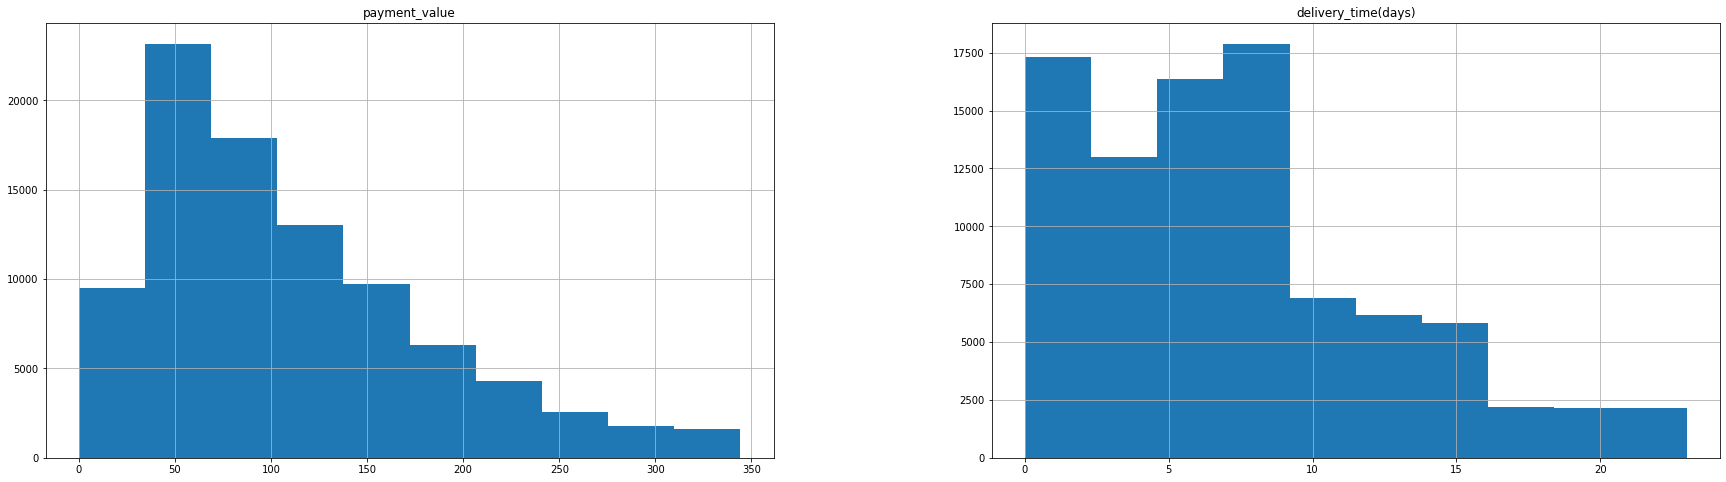

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(30,8))
numerical_column = df_table1[['payment_value','delivery_time(days)']]
for index_col,col_name in enumerate(numerical_column):
  histogram_vis = df_table1.hist(col_name,ax=axes.flatten()[index_col])
plt.show()

###Summary

According order item data set period 2016 to 2018

*   Credit cards is widely used by consumers.
*   Maximum installment up to 24.
*   Average payment value in payment type about 109.48 and mostly customers paid under 150.
*   Average delivery time is 8 days.
*   Sao Paulo (SP) is the state has the highest number of orders.

##Review conversion rate 


conversion rate =number of checkouts/number of unique visitors

In [ ]:
df_tab = df_table.copy()

In [ ]:
df_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90575 entries, 0 to 103878
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  90575 non-null  object        
 1   payment_sequential        90575 non-null  int64         
 2   payment_type              90575 non-null  object        
 3   payment_installments      90575 non-null  int64         
 4   payment_value             90575 non-null  float64       
 5   order_status              90575 non-null  object        
 6   order_purchase_timestamp  90575 non-null  datetime64[ns]
 7   order_approved_at         90575 non-null  datetime64[ns]
 8   delivery_time(days)       90575 non-null  float64       
 9   customer_unique_id        90575 non-null  object        
 10  customer_city             90575 non-null  object        
 11  customer_state            90575 non-null  object        
dtypes: datetime64[ns]

In [ ]:
df_tab['year']=df_tab['order_approved_at'].dt.year
df_tab['quarter']=df_tab['order_approved_at'].dt.quarter
df_tab

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state,year,quarter
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG,2018,2
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP,2018,2
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP,2017,4
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG,2017,4
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103873,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62,shipped,2017-11-23 17:11:23,2017-11-24 10:11:48,0.0,1c157ec47b1201b33c6ea9cc61c966fb,fortaleza,CE,2017,4
103874,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,5.0,13f283df2f4760f22b57830865761d07,foz do iguacu,PR,2018,2
103875,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65,canceled,2018-03-15 10:06:35,2018-03-15 10:29:39,0.0,0858c8086ef3b4bc86fef82638bcfa52,campo grande,MS,2018,1
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG,2017,3


###Determine amount of customers

In [ ]:
df_quarter =pd.DataFrame(df_tab.groupby(['year','quarter']).agg({'customer_unique_id':lambda x: x.nunique()}))
df_quarter.reset_index(inplace = True)
df_quarter.columns =['year','quarter','number_of_customers']
df_quarter

,year,quarter,number_of_customers
0,2016,4,273
1,2017,1,4433
2,2017,2,8114
3,2017,3,11006
4,2017,4,14884
5,2018,1,17187
6,2018,2,17504
7,2018,3,11605
8,2018,4,4


###Determine amount of customers with order status without 'canceled'

In [ ]:
df_customers =df_tab.copy()

In [ ]:
df_customers.drop(df_customers[(df_customers['order_status']=='canceled')|(df_customers['order_status']=='created')].index,inplace=True)
df_customers

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state,year,quarter
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,7.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG,2018,2
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP,2018,2
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP,2017,4
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,13.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG,2017,4
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11,delivered,2018-03-06 20:19:31,2018-03-06 20:30:39,20.0,18f40b803060d9883643b7e64e91628e,rio de janeiro,RJ,2018,1
103873,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62,shipped,2017-11-23 17:11:23,2017-11-24 10:11:48,0.0,1c157ec47b1201b33c6ea9cc61c966fb,fortaleza,CE,2017,4
103874,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,5.0,13f283df2f4760f22b57830865761d07,foz do iguacu,PR,2018,2
103877,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,5.0,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG,2017,3


In [ ]:
df_q_customers =pd.DataFrame(df_customers.groupby(['year','quarter']).agg({'customer_unique_id':lambda x: x.nunique()}))
df_q_customers.reset_index(inplace = True)
df_q_customers.columns =['year','quarter','number_of_customers_action']
df_q_customers

,year,quarter,number_of_customers_action
0,2016,4,251
1,2017,1,4388
2,2017,2,8065
3,2017,3,10949
4,2017,4,14824
5,2018,1,17066
6,2018,2,17454
7,2018,3,11520


###merge

In [ ]:
df_rate = df_quarter.merge(df_q_customers,how='left',left_on=['year','quarter'],right_on =['year','quarter'])
df_rate

,year,quarter,number_of_customers,number_of_customers_action
0,2016,4,273,251.0
1,2017,1,4433,4388.0
2,2017,2,8114,8065.0
3,2017,3,11006,10949.0
4,2017,4,14884,14824.0
5,2018,1,17187,17066.0
6,2018,2,17504,17454.0
7,2018,3,11605,11520.0
8,2018,4,4,NaN


In [ ]:
df_rate['portion'] = df_rate['number_of_customers_action']/df_rate['number_of_customers']
df_rate['percentage_%'] = df_rate['portion']*100
df_rate

,year,quarter,number_of_customers,number_of_customers_action,portion,percentage_%
0,2016,4,273,251.0,0.919414,91.941392
1,2017,1,4433,4388.0,0.989849,98.984886
2,2017,2,8114,8065.0,0.993961,99.396105
3,2017,3,11006,10949.0,0.994821,99.482101
4,2017,4,14884,14824.0,0.995969,99.596883
5,2018,1,17187,17066.0,0.992960,99.295980
6,2018,2,17504,17454.0,0.997144,99.714351
7,2018,3,11605,11520.0,0.992676,99.267557
8,2018,4,4,NaN,NaN,NaN


In [ ]:
df_rate['year_quarter']= df_rate['year'].astype(str) + '-' + df_rate['quarter'].astype(str)
df_rate

,year,quarter,number_of_customers,number_of_customers_action,portion,percentage_%,year_quarter
0,2016,4,273,251.0,0.919414,91.941392,2016-4
1,2017,1,4433,4388.0,0.989849,98.984886,2017-1
2,2017,2,8114,8065.0,0.993961,99.396105,2017-2
3,2017,3,11006,10949.0,0.994821,99.482101,2017-3
4,2017,4,14884,14824.0,0.995969,99.596883,2017-4
5,2018,1,17187,17066.0,0.992960,99.295980,2018-1
6,2018,2,17504,17454.0,0.997144,99.714351,2018-2
7,2018,3,11605,11520.0,0.992676,99.267557,2018-3
8,2018,4,4,NaN,NaN,NaN,2018-4


In [ ]:
df_rate.fillna(0)

,year,quarter,number_of_customers,number_of_customers_action,portion,percentage_%,year_quarter
0,2016,4,273,251.0,0.919414,91.941392,2016-4
1,2017,1,4433,4388.0,0.989849,98.984886,2017-1
2,2017,2,8114,8065.0,0.993961,99.396105,2017-2
3,2017,3,11006,10949.0,0.994821,99.482101,2017-3
4,2017,4,14884,14824.0,0.995969,99.596883,2017-4
5,2018,1,17187,17066.0,0.992960,99.295980,2018-1
6,2018,2,17504,17454.0,0.997144,99.714351,2018-2
7,2018,3,11605,11520.0,0.992676,99.267557,2018-3
8,2018,4,4,0.0,0.000000,0.000000,2018-4


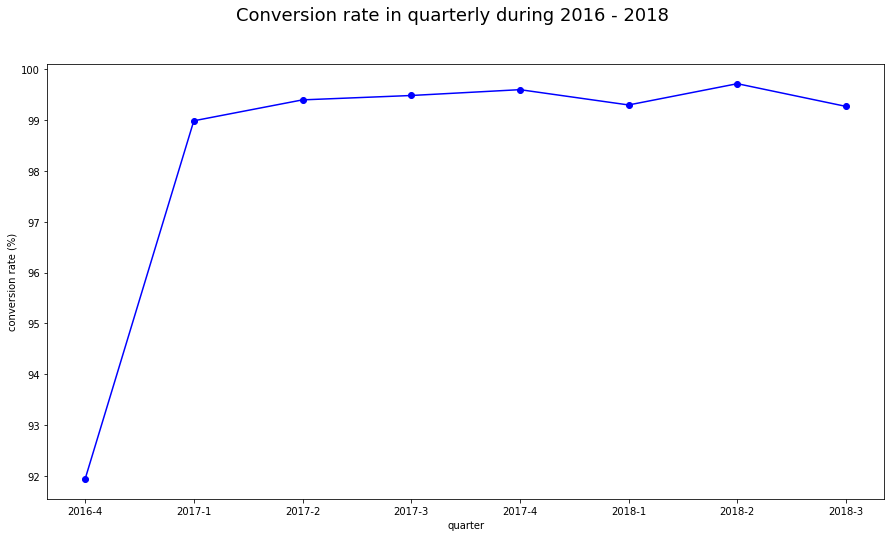

In [ ]:
fig = plt.figure(figsize=(15,8))

fig.suptitle('Conversion rate in quarterly during 2016 - 2018', fontsize=18)
plt.xlabel('quarter', fontsize=10)
plt.ylabel('conversion rate (%)', fontsize=10)

x = (df_rate['year_quarter'])
y = df_rate['percentage_%']


plt.plot(x,y,'bo-')

###Summary

conversion rate in 3rd Q of 2018 was decreased by 0.45%

###(only check) Correlation between payment value with delivery time 

In [ ]:
check = df_orders[['payment_value','delivery_time(days)']]
check.corr(method='pearson')

,payment_value,delivery_time(days)
payment_value,1.000000,0.084227
delivery_time(days),0.084227,1.000000


Summary
- correlation between payment value with delivery time is low ==> not consider


#4.Clustering

In [ ]:
df_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90575 entries, 0 to 103878
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  90575 non-null  object        
 1   payment_sequential        90575 non-null  int64         
 2   payment_type              90575 non-null  object        
 3   payment_installments      90575 non-null  int64         
 4   payment_value             90575 non-null  float64       
 5   order_status              90575 non-null  object        
 6   order_purchase_timestamp  90575 non-null  datetime64[ns]
 7   order_approved_at         90575 non-null  datetime64[ns]
 8   delivery_time(days)       90575 non-null  float64       
 9   customer_unique_id        90575 non-null  object        
 10  customer_city             90575 non-null  object        
 11  customer_state            90575 non-null  object        
 12  year             

In [ ]:
df_tab1= df_orders[['order_id','customer_unique_id','customer_state','payment_type','payment_installments','payment_value']]
df_tab1

,order_id,customer_unique_id,customer_state,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,708ab75d2a007f0564aedd11139c7708,MG,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,a8b9d3a27068454b1c98cc67d4e31e6f,SP,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,6f70c0b2f7552832ba46eb57b1c5651e,SP,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,87695ed086ebd36f20404c82d20fca87,MG,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,4291db0da71914754618cd789aebcd56,SP,credit_card,2,128.45
...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,18f40b803060d9883643b7e64e91628e,RJ,credit_card,1,194.11
103873,2e3d96522c8c378d4135c12a65c977aa,1c157ec47b1201b33c6ea9cc61c966fb,CE,credit_card,4,47.62
103874,c45067032fd84f4cf408730ff5205568,13f283df2f4760f22b57830865761d07,PR,credit_card,2,198.94
103877,7b905861d7c825891d6347454ea7863f,53b30ca78efb2b7efcd3f9e461587eb2,MG,credit_card,2,96.80


In [ ]:
df_tab1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89992 entries, 0 to 103878
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89992 non-null  object 
 1   customer_unique_id    89992 non-null  object 
 2   customer_state        89992 non-null  object 
 3   payment_type          89992 non-null  object 
 4   payment_installments  89992 non-null  int64  
 5   payment_value         89992 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ MB


In [ ]:
df_tab1.duplicated().sum()

563

In [ ]:
df_tab1.drop_duplicates()

,order_id,customer_unique_id,customer_state,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,708ab75d2a007f0564aedd11139c7708,MG,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,a8b9d3a27068454b1c98cc67d4e31e6f,SP,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,6f70c0b2f7552832ba46eb57b1c5651e,SP,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,87695ed086ebd36f20404c82d20fca87,MG,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,4291db0da71914754618cd789aebcd56,SP,credit_card,2,128.45
...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,18f40b803060d9883643b7e64e91628e,RJ,credit_card,1,194.11
103873,2e3d96522c8c378d4135c12a65c977aa,1c157ec47b1201b33c6ea9cc61c966fb,CE,credit_card,4,47.62
103874,c45067032fd84f4cf408730ff5205568,13f283df2f4760f22b57830865761d07,PR,credit_card,2,198.94
103877,7b905861d7c825891d6347454ea7863f,53b30ca78efb2b7efcd3f9e461587eb2,MG,credit_card,2,96.80


###Review payment installments per payment type

In [ ]:
df_tab1.groupby(['payment_type'])['payment_installments','payment_value'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


payment_installments                          payment_value  \
                            count      mean median max min         count   
payment_type                                                               
boleto                      17422  1.000000    1.0   1   1         17422   
credit_card                 65920  3.203823    2.0  24   1         65920   
debit_card                   1382  1.000000    1.0   1   1          1382   
voucher                      5268  1.000000    1.0   1   1          5268   

                                                 
                    mean  median     max    min  
payment_type                                     
boleto        106.443039  87.020  344.26  11.62  
credit_card   114.755662  97.545  344.27   0.01  
debit_card    104.277069  84.250  340.07  13.38  
voucher        54.880968  38.000  341.02   0.01

Summary 
- Mostly customers used credit card as payment method.
- Only credit card has maximum payment installments up to 24..
- Payment value is not depend on type cause there is not significantly different range value between the payment types.


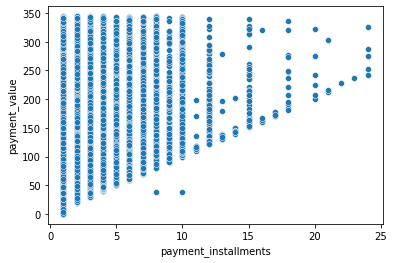

In [ ]:
sns.scatterplot(data=df_tab1, x="payment_installments", y="payment_value")

In [ ]:
df_credit_cards = df_tab1[(df_tab1['payment_type']=='credit_card')]
df_credit_cards

,order_id,customer_unique_id,customer_state,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,708ab75d2a007f0564aedd11139c7708,MG,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,a8b9d3a27068454b1c98cc67d4e31e6f,SP,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,6f70c0b2f7552832ba46eb57b1c5651e,SP,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,87695ed086ebd36f20404c82d20fca87,MG,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,4291db0da71914754618cd789aebcd56,SP,credit_card,2,128.45
...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,18f40b803060d9883643b7e64e91628e,RJ,credit_card,1,194.11
103873,2e3d96522c8c378d4135c12a65c977aa,1c157ec47b1201b33c6ea9cc61c966fb,CE,credit_card,4,47.62
103874,c45067032fd84f4cf408730ff5205568,13f283df2f4760f22b57830865761d07,PR,credit_card,2,198.94
103877,7b905861d7c825891d6347454ea7863f,53b30ca78efb2b7efcd3f9e461587eb2,MG,credit_card,2,96.80


In [ ]:
df_cluster = df_credit_cards.copy()
df_cluster

,order_id,customer_unique_id,customer_state,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,708ab75d2a007f0564aedd11139c7708,MG,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,a8b9d3a27068454b1c98cc67d4e31e6f,SP,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,6f70c0b2f7552832ba46eb57b1c5651e,SP,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,87695ed086ebd36f20404c82d20fca87,MG,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,4291db0da71914754618cd789aebcd56,SP,credit_card,2,128.45
...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,18f40b803060d9883643b7e64e91628e,RJ,credit_card,1,194.11
103873,2e3d96522c8c378d4135c12a65c977aa,1c157ec47b1201b33c6ea9cc61c966fb,CE,credit_card,4,47.62
103874,c45067032fd84f4cf408730ff5205568,13f283df2f4760f22b57830865761d07,PR,credit_card,2,198.94
103877,7b905861d7c825891d6347454ea7863f,53b30ca78efb2b7efcd3f9e461587eb2,MG,credit_card,2,96.80


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65920 entries, 0 to 103878
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              65920 non-null  object 
 1   customer_unique_id    65920 non-null  object 
 2   customer_state        65920 non-null  object 
 3   payment_type          65920 non-null  object 
 4   payment_installments  65920 non-null  int64  
 5   payment_value         65920 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.5+ MB


##Standardize

In [ ]:
numerical_variable = ['payment_installments','payment_value']
scaler = MinMaxScaler()
std_data = scaler.fit_transform(df_cluster[numerical_variable])
std_data

array([[0.30434783, 0.28850288],
       [0.        , 0.07081857],
       [0.        , 0.19084413],
       ...,
       [0.04347826, 0.57784814],
       [0.04347826, 0.28115378],
       [0.        , 0.13873235]])

In [ ]:
df_cluster[numerical_variable] = std_data
df_cluster

,order_id,customer_unique_id,customer_state,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,708ab75d2a007f0564aedd11139c7708,MG,credit_card,0.304348,0.288503
1,a9810da82917af2d9aefd1278f1dcfa0,a8b9d3a27068454b1c98cc67d4e31e6f,SP,credit_card,0.000000,0.070819
2,25e8ea4e93396b6fa0d3dd708e76c1bd,6f70c0b2f7552832ba46eb57b1c5651e,SP,credit_card,0.000000,0.190844
3,ba78997921bbcdc1373bb41e913ab953,87695ed086ebd36f20404c82d20fca87,MG,credit_card,0.304348,0.313048
4,42fdf880ba16b47b59251dd489d4441a,4291db0da71914754618cd789aebcd56,SP,credit_card,0.043478,0.373090
...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,18f40b803060d9883643b7e64e91628e,RJ,credit_card,0.000000,0.563818
103873,2e3d96522c8c378d4135c12a65c977aa,1c157ec47b1201b33c6ea9cc61c966fb,CE,credit_card,0.130435,0.138297
103874,c45067032fd84f4cf408730ff5205568,13f283df2f4760f22b57830865761d07,PR,credit_card,0.043478,0.577848
103877,7b905861d7c825891d6347454ea7863f,53b30ca78efb2b7efcd3f9e461587eb2,MG,credit_card,0.043478,0.281154


In [ ]:
df_cluster = df_cluster.drop(['order_id','payment_type','customer_state','customer_unique_id'],axis=1)

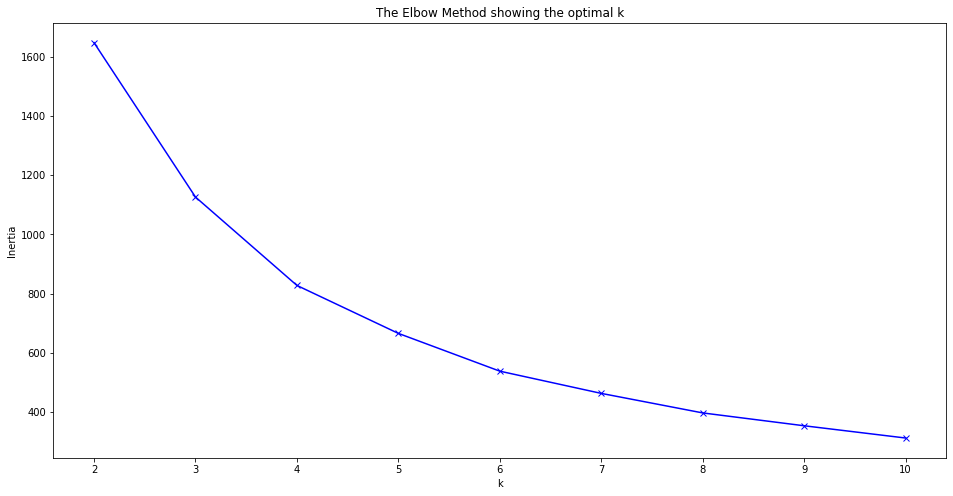

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5233249233718368
For n_clusters = 3 The average silhouette_score is : 0.4344851872665328
For n_clusters = 4 The average silhouette_score is : 0.4651824859215134
For n_clusters = 5 The average silhouette_score is : 0.4082624976487959
For n_clusters = 6 The average silhouette_score is : 0.42741642378889344
For n_clusters = 7 The average silhouette_score is : 0.39437639385112155
For n_clusters = 8 The average silhouette_score is : 0.39074524823362644
For n_clusters = 9 The average silhouette_score is : 0.3940544186798186
For n_clusters = 10 The average silhouette_score is : 0.4093004383164222


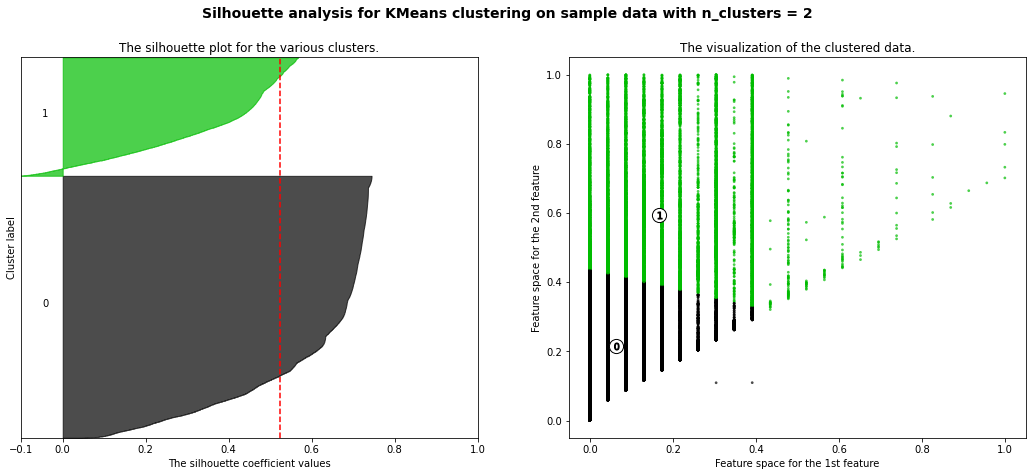

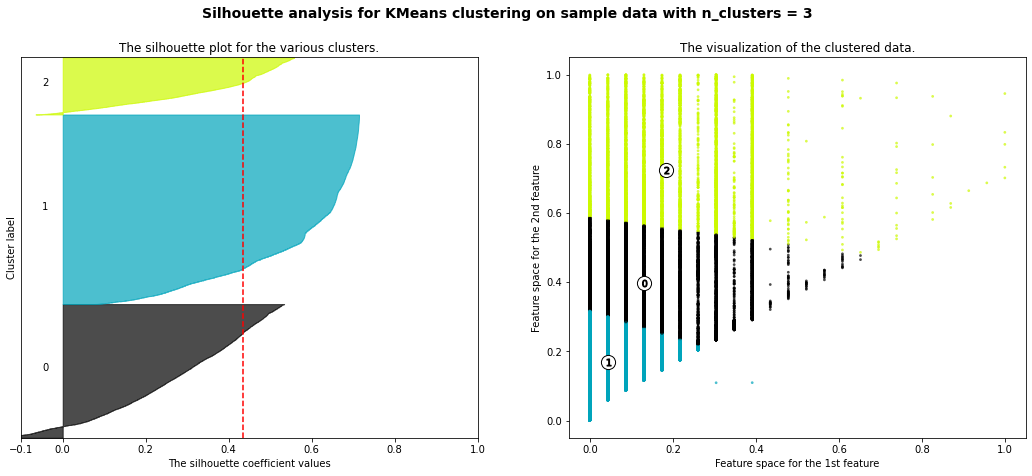

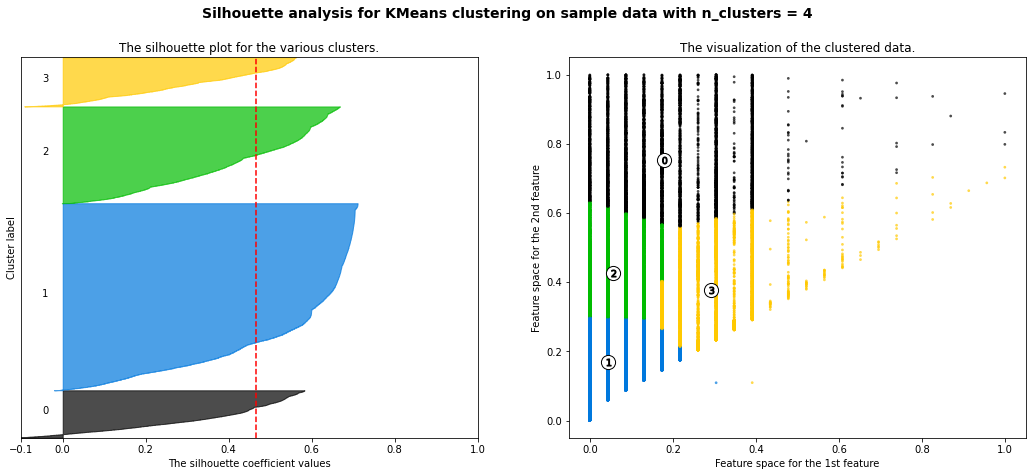

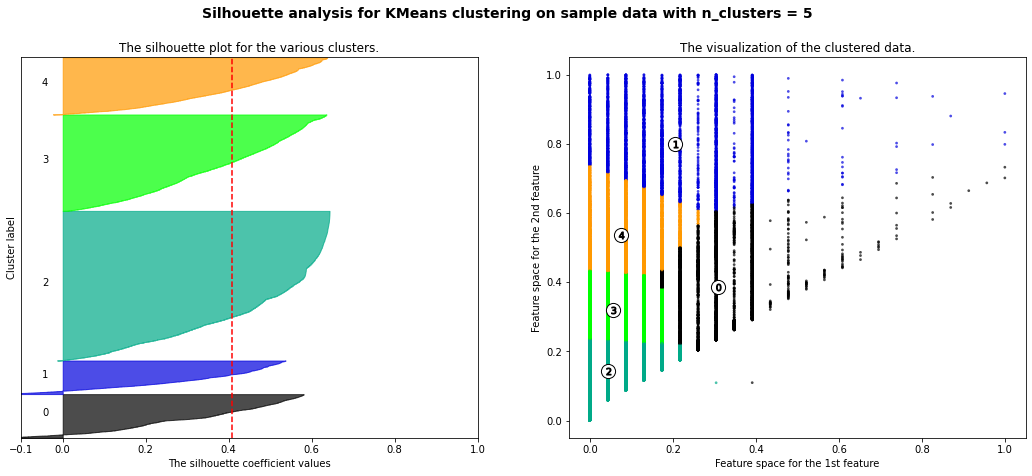

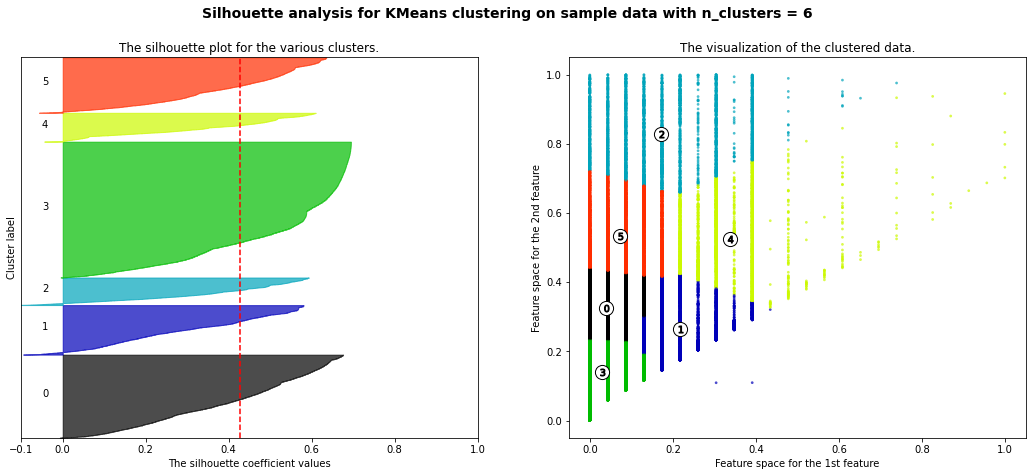

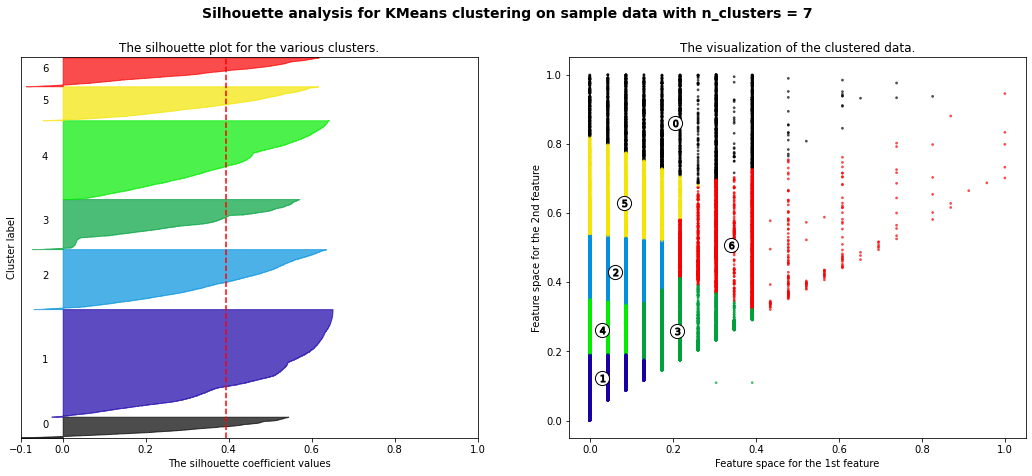

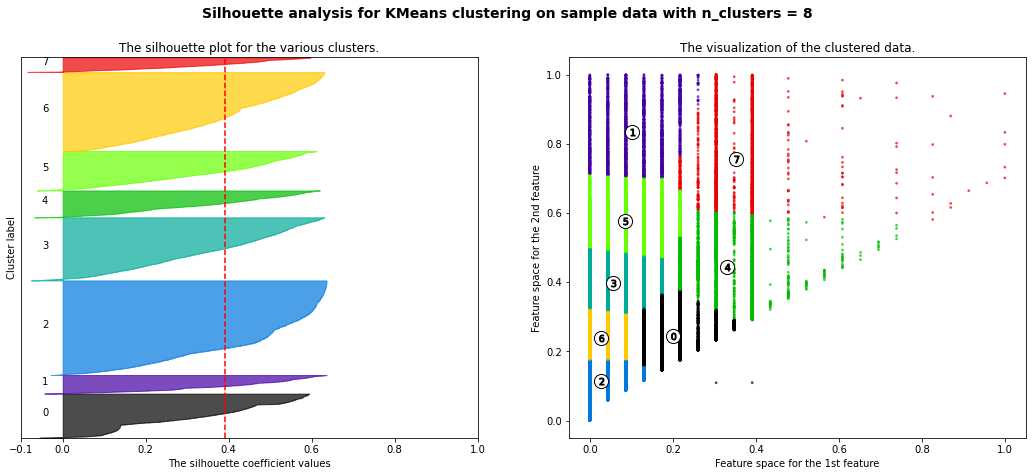

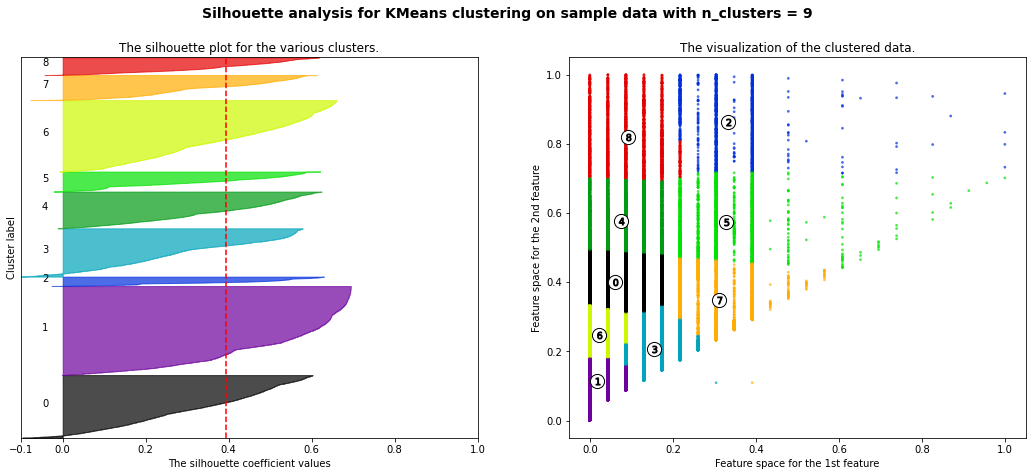

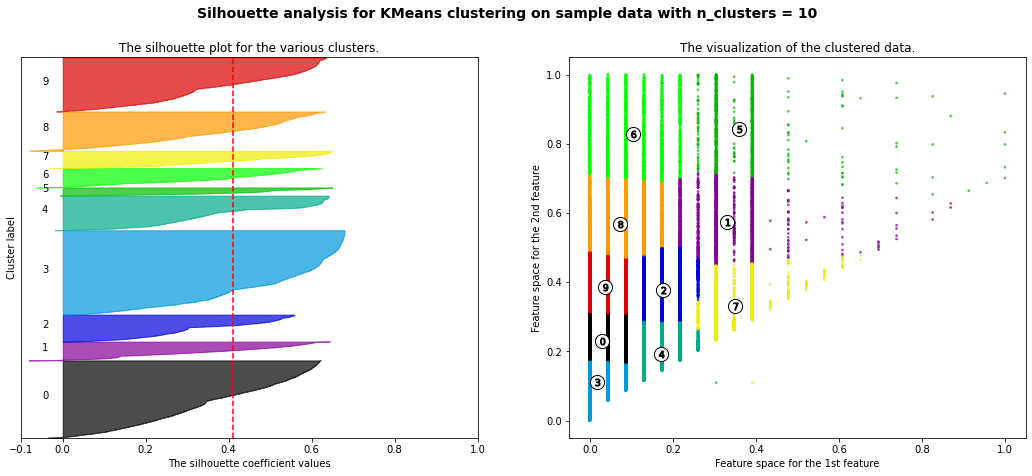

In [ ]:
from silhoutte import silhoutte_analysis
silhoutte_analysis(df_cluster,list(range(2,11)))

In [ ]:
cluster_model = cluster.KMeans(n_clusters=2)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df_credit_cards['cluster'] = cluster_label
df_credit_cards

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,order_id,customer_unique_id,customer_state,payment_type,payment_installments,payment_value,cluster
0,b81ef226f3fe1789b1e8b2acac839d17,708ab75d2a007f0564aedd11139c7708,MG,credit_card,8,99.33,0
1,a9810da82917af2d9aefd1278f1dcfa0,a8b9d3a27068454b1c98cc67d4e31e6f,SP,credit_card,1,24.39,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,6f70c0b2f7552832ba46eb57b1c5651e,SP,credit_card,1,65.71,0
3,ba78997921bbcdc1373bb41e913ab953,87695ed086ebd36f20404c82d20fca87,MG,credit_card,8,107.78,0
4,42fdf880ba16b47b59251dd489d4441a,4291db0da71914754618cd789aebcd56,SP,credit_card,2,128.45,0
...,...,...,...,...,...,...,...
103872,3531718b24dfd5022fb0d101e10e33b9,18f40b803060d9883643b7e64e91628e,RJ,credit_card,1,194.11,1
103873,2e3d96522c8c378d4135c12a65c977aa,1c157ec47b1201b33c6ea9cc61c966fb,CE,credit_card,4,47.62,0
103874,c45067032fd84f4cf408730ff5205568,13f283df2f4760f22b57830865761d07,PR,credit_card,2,198.94,1
103877,7b905861d7c825891d6347454ea7863f,53b30ca78efb2b7efcd3f9e461587eb2,MG,credit_card,2,96.80,0


In [ ]:
df_result =  pd.DataFrame(df_credit_cards.groupby(['cluster','payment_type'])['payment_installments','payment_value'].agg(['count','mean','median','max','min']))
df_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


payment_installments                           \
                                    count      mean median max min   
cluster payment_type                                                 
0       credit_card                 45408  2.466063    2.0  10   1   
1       credit_card                 20512  4.837022    4.0  24   1   

                     payment_value                                      
                             count        mean  median     max     min  
cluster payment_type                                                    
0       credit_card          45408   74.318148   71.05  150.22    0.01  
1       credit_card          20512  204.273343  191.14  344.27  110.43

##Summary Clustering

Summary to refer to credit card payment, customer segmentation could be clustered such as
- Customers paid an order with maximum payment 150.22 ==> small payment
- Customers paid an order with minimum payment 110.43 ==> big payment

##Cluster in each state

In [ ]:
df_cluster1 = df_credit_cards[(df_credit_cards['cluster']==0)]

In [ ]:
cluster1 = df_cluster1.groupby(['customer_state','cluster'])['payment_installments','payment_value'].agg(['count','mean','median','max','min'])
cluster1.reset_index(inplace = True)
cluster1.columns =['customer_state','cluster','payment_installments_count','payment_installments_mean','payment_installments_median',
                   'payment_installments_max','payment_installments_min','payment_value_count','payment_value_mean','payment_value_median','payment_value_max','payment_value_min']
cluster1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,customer_state,cluster,payment_installments_count,payment_installments_mean,payment_installments_median,payment_installments_max,payment_installments_min,payment_value_count,payment_value_mean,payment_value_median,payment_value_max,payment_value_min
0,AC,0,21,3.904762,3.0,8,1,21,80.883333,81.290,141.32,43.34
1,AL,0,108,2.870370,2.0,9,1,108,82.993796,81.200,146.09,21.09
2,AM,0,37,2.378378,1.0,8,1,37,72.837027,72.850,135.16,29.65
3,AP,0,17,2.764706,2.0,8,1,17,94.934706,99.900,144.12,42.10
4,BA,0,1274,2.728414,2.0,10,1,1274,76.126319,72.895,150.21,0.39
5,CE,0,467,2.802998,2.0,10,1,467,81.305696,78.640,148.76,0.52
6,DF,0,1008,2.274802,1.0,10,1,1008,78.045942,74.810,150.05,0.67
7,ES,0,859,2.590221,2.0,10,1,859,75.186508,72.140,148.61,0.58
8,GO,0,845,2.641420,2.0,10,1,845,77.312485,75.850,149.32,2.93
9,MA,0,221,2.787330,2.0,10,1,221,85.395475,82.730,148.14,1.70


In [ ]:
df_cluster2 = df_credit_cards[(df_credit_cards['cluster']==1)]

In [ ]:
cluster2 = df_cluster2.groupby(['customer_state','cluster'])['payment_installments','payment_value'].agg(['count','mean','median','max','min'])
cluster2.reset_index(inplace = True)
cluster2.columns =['customer_state','cluster','payment_installments_count','payment_installments_mean','payment_installments_median',
                   'payment_installments_max','payment_installments_min','payment_value_count','payment_value_mean','payment_value_median','payment_value_max','payment_value_min']
cluster2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,customer_state,cluster,payment_installments_count,payment_installments_mean,payment_installments_median,payment_installments_max,payment_installments_min,payment_value_count,payment_value_mean,payment_value_median,payment_value_max,payment_value_min
0,AC,1,21,4.000000,4.0,10,1,21,227.299524,220.390,318.30,130.22
1,AL,1,79,4.936709,4.0,12,1,79,205.850127,196.880,323.74,119.20
2,AM,1,32,4.312500,3.0,10,1,32,206.958750,195.545,334.01,121.87
3,AP,1,11,3.818182,3.0,8,1,11,218.662727,222.710,324.15,146.20
4,BA,1,746,5.189008,4.0,17,1,746,206.814571,194.385,344.07,116.11
5,CE,1,279,5.275986,5.0,24,1,279,210.141039,197.250,342.38,114.36
6,DF,1,483,4.302277,3.0,12,1,483,203.784203,195.350,343.51,118.71
7,ES,1,477,4.926625,4.0,15,1,477,202.522621,193.600,342.15,113.80
8,GO,1,438,4.878995,4.0,15,1,438,206.622785,194.935,343.95,116.44
9,MA,1,154,4.779221,4.0,16,1,154,212.002987,199.860,336.06,117.37


##Review payment type dominated in unfinished orders

In [ ]:
df_unordered.groupby(['payment_type'])['payment_installments','payment_value'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


payment_installments                          payment_value  \
                            count      mean median max min         count   
payment_type                                                               
boleto                         85  1.000000    1.0   1   1            85   
credit_card                   392  3.313776    3.0  13   1           392   
debit_card                      6  1.000000    1.0   1   1             6   
voucher                       100  1.000000    1.0   1   1           100   

                                                  
                    mean   median     max    min  
payment_type                                      
boleto        109.238471   90.280  321.34  20.23  
credit_card   121.112602  101.640  343.90   0.33  
debit_card     51.091667   36.075  103.85  23.29  
voucher        87.354300   70.535  310.34   2.96

Mostly customers who not finished the order  using credit cards with average 120.902992.

##Decide state to target market

###Review amount of orders in every state

In [ ]:
df_state =pd.DataFrame(df_tab.groupby(['customer_state']).agg({'order_id':lambda x: x.nunique()}))
df_state.reset_index(inplace = True)
df_state.columns =['customer_state','number_of_orders']
df_state

,customer_state,number_of_orders
0,AC,56
1,AL,236
2,AM,78
3,AP,38
4,BA,2617
5,CE,939
6,DF,1898
7,ES,1746
8,GO,1739
9,MA,534


Review amount of orders in every state in condition orders were approved until delivered

In [ ]:
df_tab2 = df_tab[(df_tab['order_status']=='canceled')]

In [ ]:
df_state1 =pd.DataFrame(df_tab2.groupby(['customer_state']).agg({'order_id':lambda x: x.nunique()}))
df_state1.reset_index(inplace = True)
df_state1.columns =['customer_state','order_canceled']
df_state1

,customer_state,order_canceled
0,BA,15
1,CE,5
2,DF,4
3,ES,7
4,GO,9
5,MA,4
6,MG,52
7,MS,2
8,MT,1
9,PA,4


merge the original data with cancelation-order data

In [ ]:
df_state_table = df_state.merge(df_state1,how = 'left',left_on ='customer_state', right_on = 'customer_state')
df_state_table

,customer_state,number_of_orders,order_canceled
0,AC,56,NaN
1,AL,236,NaN
2,AM,78,NaN
3,AP,38,NaN
4,BA,2617,15.0
5,CE,939,5.0
6,DF,1898,4.0
7,ES,1746,7.0
8,GO,1739,9.0
9,MA,534,4.0


###Determine cancelation rate  in each state

In [ ]:
df_state_table['cancelation_rate'] = df_state_table['order_canceled']/df_state_table['number_of_orders']
df_state_table['percentage_%'] = df_state_table['cancelation_rate']*100
df_state_table

,customer_state,number_of_orders,order_canceled,cancelation_rate,percentage_%
0,AC,56,NaN,NaN,NaN
1,AL,236,NaN,NaN,NaN
2,AM,78,NaN,NaN,NaN
3,AP,38,NaN,NaN,NaN
4,BA,2617,15.0,0.005732,0.573175
5,CE,939,5.0,0.005325,0.532481
6,DF,1898,4.0,0.002107,0.210748
7,ES,1746,7.0,0.004009,0.400916
8,GO,1739,9.0,0.005175,0.517539
9,MA,534,4.0,0.007491,0.749064


In [ ]:
df_state_table = df_state_table.fillna(0)
df_state_table

,customer_state,number_of_orders,order_canceled,cancelation_rate,percentage_%
0,AC,56,0.0,0.000000,0.000000
1,AL,236,0.0,0.000000,0.000000
2,AM,78,0.0,0.000000,0.000000
3,AP,38,0.0,0.000000,0.000000
4,BA,2617,15.0,0.005732,0.573175
5,CE,939,5.0,0.005325,0.532481
6,DF,1898,4.0,0.002107,0.210748
7,ES,1746,7.0,0.004009,0.400916
8,GO,1739,9.0,0.005175,0.517539
9,MA,534,4.0,0.007491,0.749064


visualisation

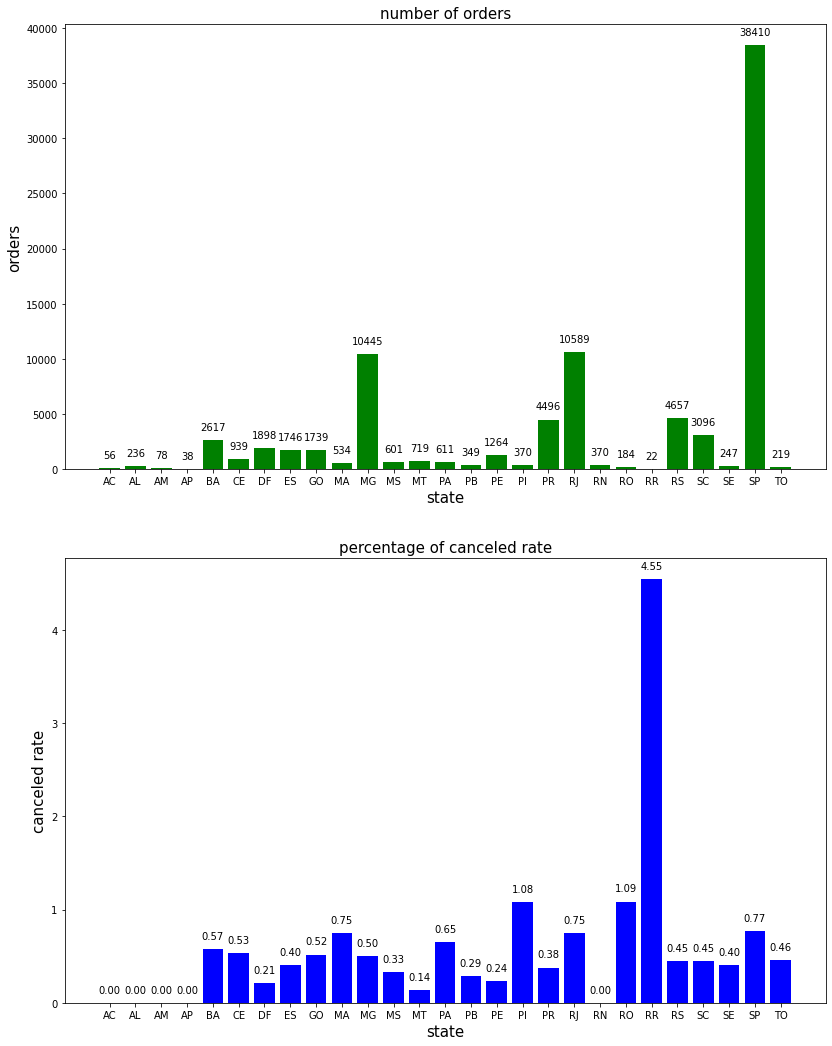

In [ ]:
fig = plt.figure(figsize=(30,18))

plt.subplot(2, 2, 1)

plt.title('number of orders', fontsize=15)
plt.xlabel('state', fontsize=15)
plt.ylabel('orders', fontsize=15)

x1 = (df_state_table['customer_state'])
y1 = (df_state_table['number_of_orders'])

plt.bar(x1, y1,color='green')

# zip joins x and y coordinates in pairs
for x,y in zip(x1,y1):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



plt.subplot(2, 2, 3)
plt.title('percentage of canceled rate', fontsize=15)
plt.xlabel('state', fontsize=15)
plt.ylabel('canceled rate', fontsize=15)

x2 = (df_state_table['customer_state'])
y2 = (df_state_table['percentage_%'])

plt.bar(x2, y2,color='blue')

# zip joins x and y coordinates in pairs
for x,y in zip(x2,y2):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()

In [ ]:
df_table1['order_status'].value_counts()

delivered     88377
shipped        1071
invoiced        277
processing      265
approved          2
Name: order_status, dtype: int64

###Review customers in Sao Paulo (SP) who canceled the order

In [ ]:
sp_canceled = df_unordered.copy()
sp_canceled.drop(sp_canceled[(sp_canceled['order_status']!='canceled')|(sp_canceled['customer_state']!='SP')].index,inplace=True)
sp_canceled

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
28,5d9c5817e278892b7498d90bfa28ade8,1,credit_card,2,290.16,canceled,2018-04-26 08:13:54,2018-04-26 08:32:52,0.0,67a7e94ec59ef6d6ba83942c81d39b9a,sao paulo,SP
68,947e9c6bfd83a06953c420ef92d3da6e,1,voucher,1,69.46,canceled,2018-08-15 15:13:32,2018-08-15 15:13:32,0.0,a2ac4c64994786e12db70e1782d2bfef,sao paulo,SP
848,750ed62dff96bf5713b8c6a6bbfdc948,1,boleto,1,189.96,canceled,2018-05-28 11:18:59,2018-05-29 03:15:20,0.0,fd8ae395b4b313a4af523a90a92d6c10,guarulhos,SP
858,4e27ad7f1a6821ceddc8442eb1875014,1,credit_card,1,69.67,canceled,2018-04-16 20:22:37,2018-04-16 20:35:26,0.0,f58a61a7a24c4bddf8fa238ad645e3cd,mogi das cruzes,SP
1028,27667a063cb59b5d987a5a71c192cce5,1,voucher,1,118.35,canceled,2018-08-27 19:54:54,2018-08-27 19:54:54,0.0,391d6062da3dd65b4de4524f28c478de,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
101708,6c16d886be4fe03174a289a4ca70a775,1,credit_card,2,107.55,canceled,2018-06-05 15:06:16,2018-06-05 15:31:39,0.0,4e1567240be3d719ba5c79afed039693,sao paulo,SP
101758,1057bf6391c17f9b6960dd996029e1dc,2,voucher,1,18.12,canceled,2017-07-29 12:56:17,2017-07-29 13:05:18,0.0,2592816433dfbb3051af91ba91625de5,sao paulo,SP
102128,38b584be7174802377777bcd60e7a459,1,credit_card,2,77.78,canceled,2017-11-02 23:12:48,2017-11-02 23:30:48,0.0,4eb6fcfd481ef3c2ab3afba135ef4bcc,sao paulo,SP
103222,e697685891b55205f61d598d64db1c1f,1,credit_card,3,244.06,canceled,2017-11-06 09:05:48,2017-11-06 09:26:38,0.0,42f791f74ef1f0e1befd3eb3f117c8c2,indaiatuba,SP


In [ ]:
sp_canceled.groupby(['payment_type'])['payment_installments','payment_value'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


payment_installments                          payment_value  \
                            count      mean median max min         count   
payment_type                                                               
boleto                         46  1.000000    1.0   1   1            46   
credit_card                   210  3.009524    2.0  11   1           210   
debit_card                      4  1.000000    1.0   1   1             4   
voucher                        61  1.000000    1.0   1   1            61   

                                                
                    mean median     max    min  
payment_type                                    
boleto         96.275435  75.03  321.34  20.23  
credit_card   111.784762  87.03  343.90   0.33  
debit_card     44.900000  26.23  103.85  23.29  
voucher        78.244426  63.89  288.71   2.96

In [ ]:
sp_canceled_cc = df_unordered.copy()
sp_canceled_cc.drop(sp_canceled_cc[(sp_canceled_cc['payment_type']!='credit_card')|(sp_canceled_cc['order_status']!='canceled')|(sp_canceled_cc['customer_state']!='SP')].index,inplace=True)
sp_canceled_cc

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
28,5d9c5817e278892b7498d90bfa28ade8,1,credit_card,2,290.16,canceled,2018-04-26 08:13:54,2018-04-26 08:32:52,0.0,67a7e94ec59ef6d6ba83942c81d39b9a,sao paulo,SP
858,4e27ad7f1a6821ceddc8442eb1875014,1,credit_card,1,69.67,canceled,2018-04-16 20:22:37,2018-04-16 20:35:26,0.0,f58a61a7a24c4bddf8fa238ad645e3cd,mogi das cruzes,SP
2005,5627a31940ca40213ead4a6a71e7b386,1,credit_card,1,69.14,canceled,2018-05-21 12:22:10,2018-05-21 15:34:08,0.0,95cf7888416d4c0e79745f1fcc93a407,sao paulo,SP
2273,5687ad45d33870c742b2cdacaf758353,1,credit_card,1,69.14,canceled,2018-05-21 22:53:49,2018-05-22 02:15:44,0.0,373f04d122fdc622aa00598a81e2ac1a,sao paulo,SP
2533,d4ceda456a12b48a1f8a592aa2070b30,1,credit_card,5,80.88,canceled,2017-10-10 14:07:52,2017-10-10 14:41:31,0.0,c4885a20001538b8c0b0a0fab5ba03f3,ibira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
100967,6e27f04e8947d6be930769e3ce557bdf,1,credit_card,3,35.96,canceled,2017-03-05 01:03:51,2017-03-05 01:15:09,0.0,79a7807093e30526f4087b6f11eded81,sao roque,SP
101679,808c7c69c2778bdf4689eee0286e2bef,1,credit_card,1,133.98,canceled,2018-02-22 07:57:07,2018-02-22 08:10:27,0.0,22af178809fa6887af2cc4f7d7bdc0bc,sao paulo,SP
101708,6c16d886be4fe03174a289a4ca70a775,1,credit_card,2,107.55,canceled,2018-06-05 15:06:16,2018-06-05 15:31:39,0.0,4e1567240be3d719ba5c79afed039693,sao paulo,SP
102128,38b584be7174802377777bcd60e7a459,1,credit_card,2,77.78,canceled,2017-11-02 23:12:48,2017-11-02 23:30:48,0.0,4eb6fcfd481ef3c2ab3afba135ef4bcc,sao paulo,SP


In [ ]:
sp_canceled_cc.groupby(['payment_installments'])['payment_value'].agg(['count','min','max'])

,count,min,max
payment_installments,,,
1,83,0.33,280.20
2,32,24.42,343.90
3,38,31.91,267.94
4,16,49.34,317.88
5,12,51.75,268.59
6,4,64.22,327.60
7,2,71.43,155.63
8,9,87.16,312.43
9,4,90.18,247.26


Mostly customers in SP state who canceled that paid by credit card did not optimize to utilize payment_installment 

##Customer profile in Sao Paulo (SP)

In [ ]:
df_SP = df_table1[(df_table1['customer_state']=='SP')]
df_SP

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,delivery_time(days),customer_unique_id,customer_city,customer_state
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,1.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,10.0,4291db0da71914754618cd789aebcd56,conchas,SP
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12,delivered,2018-05-07 13:20:41,2018-05-07 15:31:14,4.0,6e3c218d5f0434ddc4af3d6a60767bbf,leme,SP
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,delivered,2017-06-05 10:45:54,2017-06-05 10:55:16,9.0,9db67268a3fee1d4b13faaeb90af07c0,jose bonifacio,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
103848,bc2b2f5f5aad2762906c62abe09d5677,1,credit_card,1,114.13,delivered,2017-09-19 17:18:49,2017-09-19 17:30:23,4.0,443debe03aa7f603c341f748d4574d3d,sao paulo,SP
103854,e0657085c2b6297a32f39efa200cdf72,1,credit_card,1,26.37,delivered,2018-08-04 21:12:12,2018-08-04 21:24:28,1.0,107df8fcfe13d1a58006f0a11dc7522c,sao paulo,SP
103867,38d11c87fc409de31e930084abb0c7a4,1,credit_card,7,91.03,delivered,2018-08-17 17:38:51,2018-08-17 17:50:15,4.0,7bce2e8bcb39be572c7ec072e5cc3130,piracicaba,SP
103869,d41f1036712e18ee525939d08b7a1c98,1,credit_card,1,3.57,delivered,2018-01-06 11:37:12,2018-01-06 11:47:34,0.0,2193e33803ae472856950a43406e2dd4,sao paulo,SP


In [ ]:
df_SP.duplicated().sum()

0

In [ ]:
sp_payment = pd.DataFrame(df_SP['payment_type'].value_counts())
sp_payment.reset_index(inplace = True)
sp_payment.columns =['payment_type','number_of_payments']
sp_payment

,payment_type,number_of_payments
0,credit_card,29262
1,boleto,7561
2,voucher,2358
3,debit_card,718


Customers profile refer to payment type and payment value

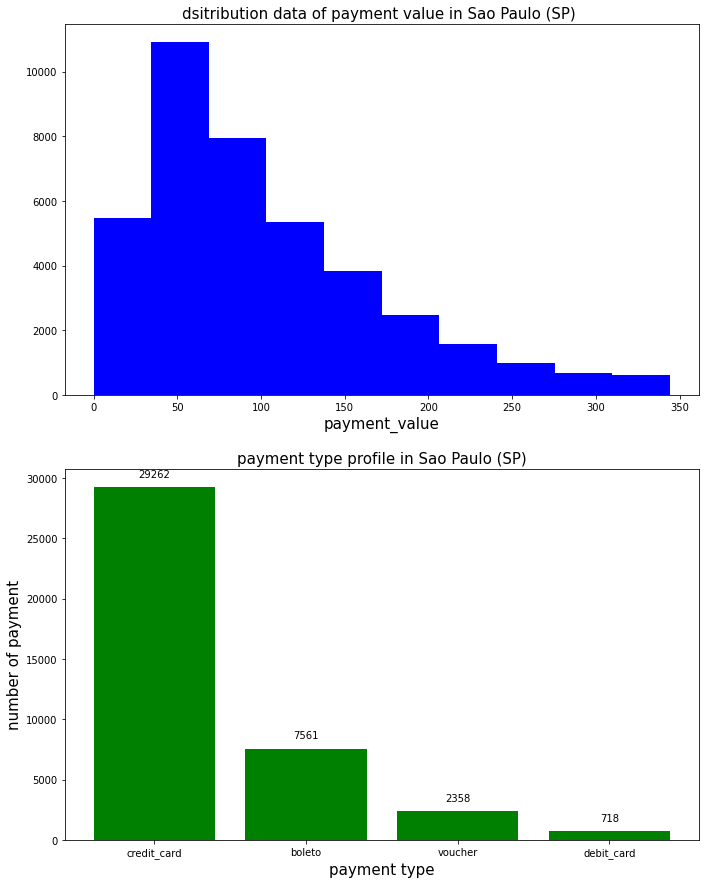

In [ ]:
fig = plt.figure(figsize=(25,15))


plt.subplot(2, 2, 1)
plt.title('dsitribution data of payment value in Sao Paulo (SP) ', fontsize=15)
plt.xlabel('payment_value', fontsize=15)

x1 = (df_SP['payment_value'])


plt.hist(x1,color='blue')

plt.subplot(2, 2, 3)

plt.title('payment type profile in Sao Paulo (SP)', fontsize=15)
plt.xlabel('payment type', fontsize=15)
plt.ylabel('number of payment', fontsize=15)

x2 = (sp_payment['payment_type'])
y2 = (sp_payment['number_of_payments'])

plt.bar(x2, y2,color='green')

# zip joins x and y coordinates in pairs
for x,y in zip(x2,y2):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

###Cluster  in Sao Paulo (SP)

In [ ]:
sp_cluster1 = cluster1[(cluster1['customer_state']=='SP')]
sp_cluster1

,customer_state,cluster,payment_installments_count,payment_installments_mean,payment_installments_median,payment_installments_max,payment_installments_min,payment_value_count,payment_value_mean,payment_value_median,payment_value_max,payment_value_min
25,SP,0,21317,2.303232,2.0,10,1,21317,70.937964,66.78,150.22,0.01


In [ ]:
sp_cluster2 = cluster2[(cluster1['customer_state']=='SP')]
sp_cluster2

,customer_state,cluster,payment_installments_count,payment_installments_mean,payment_installments_median,payment_installments_max,payment_installments_min,payment_value_count,payment_value_mean,payment_value_median,payment_value_max,payment_value_min
25,SP,1,7945,4.717432,4.0,23,1,7945,203.651031,189.37,344.23,113.61


##Summary

- Target market in SP (Sao Paolo) state that consider to the highest purchase  and the highest state utilize a credit card.
- Mostly customers paid under 150.22 => small payment

#5. Recomendation

##Campaign Target

Increasing conversion rate by offering payment using credit card to customer in Sao Paulo (SP) pay in small payment (under 150.22)

##Campaign Startegy

Encourage customers  who transaction in  small payment to use payment using credit card with set up maximum payment installment up to 10 in maximum transaction 150.22 within certain period by giving rewards or points or cashback which will return on shopping cart page.